In [2]:

maze5 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]


import heapq
from tracemalloc import start

# Define Manhattan distance heuristic
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])



# Get neighbors in 4 directions
def get_neighbors(pos, maze):
    neighbors = []
    directions = [(-1,0), (1,0), (0,-1), (0,1)]  # up, down, left, right
    rows, cols = len(maze), len(maze[0])
    for dx, dy in directions:
        nx, ny = pos[0] + dx, pos[1] + dy
        if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != 1:
            neighbors.append((nx, ny))
    return neighbors



def processed_maze(maze):

    # Convert maze to numeric values for processing
    processed_maze = []
    for row in maze:
        new_row = []
        for cell in row:
            if cell == 'A':
                start = (maze.index(row), row.index(cell))
                new_row.append(0)
            elif cell == 'B':
                goal = (maze.index(row), row.index(cell))
                new_row.append(0)
            else:
                new_row.append(cell)
        processed_maze.append(new_row)
    return processed_maze, start, goal



# Greedy Best-First Search

def greedy_bfs(maze):

    proc_maze, start, goal = processed_maze(maze)

    visited = set()
    came_from = {}

    heap = []
    heapq.heappush(heap, (manhattan(start, goal), start))

    while heap:
        _, current = heapq.heappop(heap)

        if current == goal:
            break

        if current in visited:
            continue
        visited.add(current)

        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                heapq.heappush(heap, (manhattan(neighbor, goal), neighbor))
                if neighbor not in came_from:
                    came_from[neighbor] = current

    # Reconstruct path
    path = []
    curr = goal
    while curr != start:
        path.append(curr)
        curr = came_from.get(curr)
        if curr is None:
            print("No path found.")
            return []
    path.append(start)
    path.reverse()
    return path



path = greedy_bfs(maze5)

# Print path
print("Path from A to B:")
print(path)



def visualize_path(path, maze):
    for r, c in path:
        if (r, c) != start and (r, c) != goal:
            maze[r][c] = '*'

    for row in maze:
        print(' '.join(str(cell) for cell in row))

visualize_path(path, maze5)

maze5

visualize_path(path, maze5)

def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# Find start (A) and goal (B)
def find_positions(maze):
    start = goal = None
    for i in range(len(maze)):
        for j in range(len(maze[0])):
            if maze[i][j] == 'A':
                start = (i, j)
            elif maze[i][j] == 'B':
                goal = (i, j)
    return start, goal

def visualize_manhattan(maze):
    start, goal = find_positions(maze)
    rows, cols = len(maze), len(maze[0])

    dist_matrix = []
    for i in range(rows):
        row = []
        for j in range(cols):
            if maze[i][j] == 1:   # Wall
                row.append("█")
            elif maze[i][j] == 'A':
                row.append('A')
            elif maze[i][j] == 'B':
                row.append('B')
            else:
                row.append(manhattan((i, j), goal))
        dist_matrix.append(row)

    return dist_matrix
     


visualize_manhattan(maze5)

# Pretty print function
def print_matrix(matrix):
    for row in matrix:
        row_str = ""
        for val in row:
            if val == "█":
                row_str += " █ "   # Wall
            elif val == 'A' or val == 'B':
                row_str += f" {val} "
            else:
                row_str += f"{val:2d} "  # Align numbers
        print(row_str)
    print()  # Extra space after the grid

print_matrix(visualize_manhattan(maze5))

maze5 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]
     

maze4 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0,'B'],
]


maze3 = [
    ['A', 0,  1,  0, 0, 0, 0, 0],
    [0,   0,  1,  0, 1, 1, 1, 0],
    [0,   1,  1,  0, 0, 0, 1, 0],
    [0,   0,  0,  0, 1, 0, 1, 0],
    [1,   1,  1,  0, 1, 0, 0, 0],
    [0,   0,  0,  0, 0, 1, 1, 0],
    [0,   1,  1,  1, 0, 0, 0, 0],
    [0,   0,  0,  0, 0, 1, 1,'B'],
]


maze2 = [
    ['A', 0,   1,  0, 0, 0],
    [1,   0,   1,  0, 1, 0],
    [0,   0,   0,  0, 1, 0],
    [0,   1,   1,  1, 1, 0],
    [0,   0,   0,  0, 0, 0],
    [0,   1,   1,  1, 1,'B'],
]

maze1 = [
    ['A', 0, 0, 0, 'B'],
    [1,   1, 1, 1,  0],
    [0,   0, 0, 0,  0],
    [0,   1, 1, 1,  0],
    [0,   0, 0, 0,  0],
]

Path from A to B:
[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]


NameError: name 'goal' is not defined

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5)]


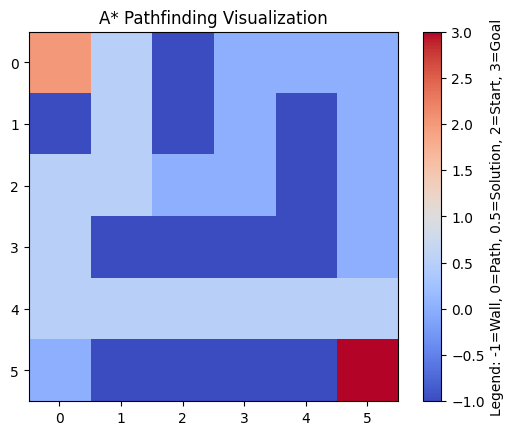

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Maze definition
maze = [ 
    ['A', 0,   1,  0, 0, 0],
    [1,   0,   1,  0, 1, 0],
    [0,   0,   0,  0, 1, 0],
    [0,   1,   1,  1, 1, 0],
    [0,   0,   0,  0, 0, 0],
    [0,   1,   1,  1, 1,'B'],
]

rows, cols = len(maze), len(maze[0])

# Find start and goal
start, goal = None, None
for i in range(rows):
    for j in range(cols):
        if maze[i][j] == 'A':
            start = (i, j)
        elif maze[i][j] == 'B':
            goal = (i, j)

# Manhattan distance
def heuristic(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

# A* Search
def astar(maze, start, goal):
    open_set = []
    heapq.heappush(open_set, (0+heuristic(start, goal), 0, start, [start]))
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)

        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path

        for dx, dy in [(1,0), (-1,0), (0,1), (0,-1)]:
            nx, ny = current[0]+dx, current[1]+dy
            if 0 <= nx < rows and 0 <= ny < cols:
                if maze[nx][ny] != 1:  # not a wall
                    heapq.heappush(open_set, (g+1+heuristic((nx,ny), goal), g+1, (nx,ny), path+[(nx,ny)]))
    return None

path = astar(maze, start, goal)

print("Path found:", path)

# Visualization
maze_numeric = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        if maze[i][j] == 1:
            maze_numeric[i][j] = -1  # wall
        elif maze[i][j] == 'A':
            maze_numeric[i][j] = 2   # start
        elif maze[i][j] == 'B':
            maze_numeric[i][j] = 3   # goal

if path:
    for (x,y) in path[1:-1]:  # exclude start & goal
        maze_numeric[x][y] = 0.5  # path marker

plt.imshow(maze_numeric, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Legend: -1=Wall, 0=Path, 0.5=Solution, 2=Start, 3=Goal")
plt.title("A* Pathfinding Visualization")
plt.show()


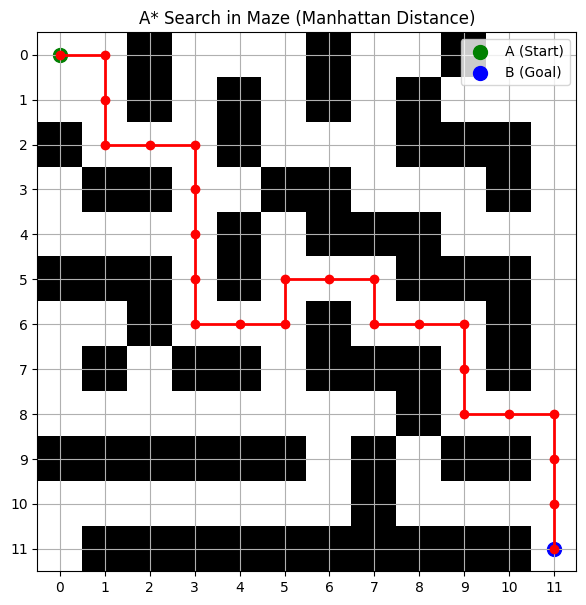

Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]


In [2]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # reverse

        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # wall
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # no path found

# -------------------------------
# Convert maze with A and B
# -------------------------------
maze5 = [
    ['A', 0,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1,'B'],
]


maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start, goal = None, None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

# -------------------------------
# Run A*
# -------------------------------
path = astar(maze_np, start, goal)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7,7))
plt.imshow(maze_np, cmap="binary")  # 1=black (wall), 0=white (free)
plt.xticks(range(maze_np.shape[1]))
plt.yticks(range(maze_np.shape[0]))
plt.grid(True)

if path:
    px, py = zip(*path)
    plt.plot(py, px, marker="o", color="red", linewidth=2)

plt.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
plt.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
plt.legend()
plt.title("A* Search in Maze (Manhattan Distance)")
plt.show()

print("Path found:", path)

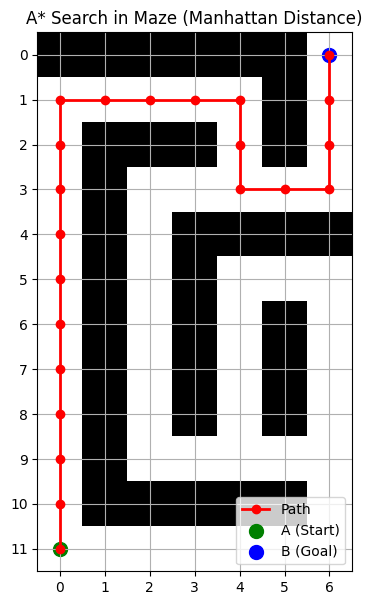

Path found: [(11, 0), (10, 0), (9, 0), (8, 0), (7, 0), (6, 0), (5, 0), (4, 0), (3, 0), (2, 0), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 6), (2, 6), (1, 6), (0, 6)]


In [5]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # reverse

        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # wall
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # no path found

# -------------------------------
# Maze with A (start), B (goal)
# -------------------------------
maze5 = [
   [1,1,1,1,1,1,'B'],
[0,0,0,0,0,1,0],
[0,1,1,1,0,1,0],
[0,1,0,0,0,0,0],
[0,1,0,1,1,1,1],
[0,1,0,1,0,0,0],
[0,1,0,1,0,1,0],
[0,1,0,1,0,1,0],
[0,1,0,1,0,1,0],
[0,1,0,0,0,0,0],
[0,1,1,1,1,1,0],
['A',0,0,0,0,0,0],
]

# Convert to numeric for processing
maze_np = np.zeros((len(maze5), len(maze5[0])), dtype=int)
start, goal = None, None

for i in range(len(maze5)):
    for j in range(len(maze5[0])):
        if maze5[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze5[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze5[i][j]

# -------------------------------
# Run A*
# -------------------------------
path = astar(maze_np, start, goal)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7,7))
plt.imshow(maze_np, cmap="binary")  # 1=black (wall), 0=white (free)
plt.xticks(range(maze_np.shape[1]))
plt.yticks(range(maze_np.shape[0]))
plt.grid(True)

if path:
    px, py = zip(*path)
    plt.plot(py, px, marker="o", color="red", linewidth=2, label="Path")

plt.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
plt.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
plt.legend()
plt.title("A* Search in Maze (Manhattan Distance)")
plt.show()

print("Path found:", path)


Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 5)]


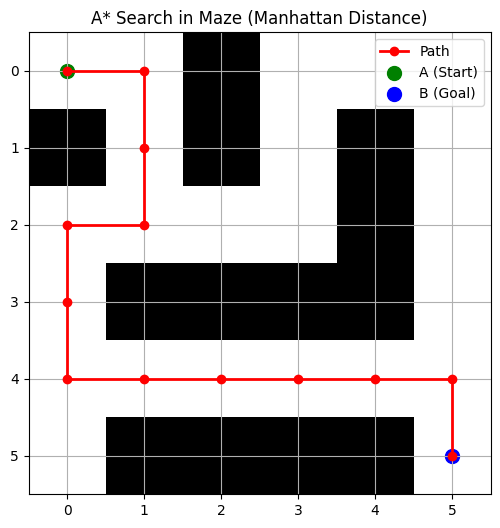

In [4]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Manhattan distance heuristic
# -------------------------------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

# -------------------------------
# A* Search Implementation
# -------------------------------
def astar(maze, start, goal):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Reconstruct path
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]  # reverse order

        # 4 directions
        for dx, dy in [(0,1), (1,0), (0,-1), (-1,0)]:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:  # wall
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + manhattan(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None  # no path found

# -------------------------------
# Example Maze
# -------------------------------
maze = [
    ['A', 0, 1, 0, 0, 0],
    [1,   0, 1, 0, 1, 0],
    [0,   0, 0, 0, 1, 0],
    [0,   1, 1, 1, 1, 0],
    [0,   0, 0, 0, 0, 0],
    [0,   1, 1, 1, 1, 'B'],
]

# Convert to numeric form
maze_np = np.zeros((len(maze), len(maze[0])), dtype=int)
start, goal = None, None

for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze[i][j]

# -------------------------------
# Run A*
# -------------------------------
path = astar(maze_np, start, goal)
print("Path found:", path)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(6,6))
plt.imshow(maze_np, cmap="binary")  # 1=black, 0=white
plt.xticks(range(maze_np.shape[1]))
plt.yticks(range(maze_np.shape[0]))
plt.grid(True)

# Draw path if exists
if path:
    px, py = zip(*path)
    plt.plot(py, px, marker="o", color="red", linewidth=2, label="Path")

plt.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
plt.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
plt.legend()
plt.title("A* Search in Maze (Manhattan Distance)")
plt.show()
